# Introduction to `Monitor`

The `Monitor` object is used to create a concurrent process that will monitor the host process memory and cpu usage, record notes, and plot current progress as needed.

In [4]:
import sys
sys.path.append('../')
import coproc

## Receiving Stats Client-side

In this example, I open the monitor and it runs while the inner code is executing. The monitor routinely checks for memory usage, and every so often sends a note to the monitor that is recorded. Uing `get_stats()` we can retrieve the statistics and plot it using `get_stats_plot()`. Notice that the notes appear in the figure.

starting main loop


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [00:05<00:00, 1994977.06it/s]


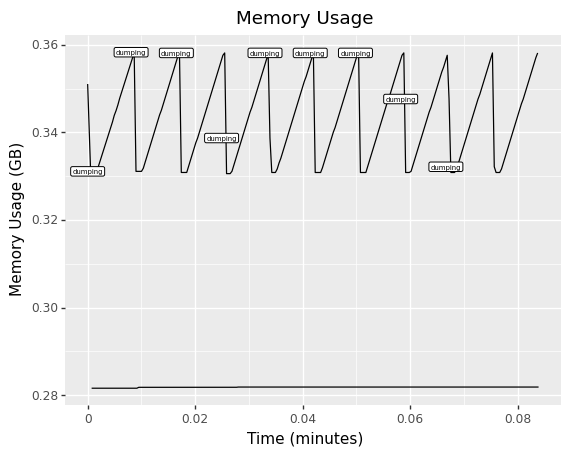

<ggplot: (8753345643590)>

In [5]:
import time
import tqdm
with coproc.Monitor(snapshot_seconds=0.01) as m:
    l = list()
    for i in tqdm.tqdm(range(int(1e7))):
        l.append(i)
        if i > 0 and i % int(1e6) == 0:
            l = list()
            m.add_note('dumping')
    stats = m.get_stats()
stats.get_stats_plot()